In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from fast_gen import *
from numpy import random

Using TensorFlow backend.


In [71]:
path = "/data/jhoward/fast/dogscats/"
bs=64
shuffle=False
trn_fnames, trn_y, all_labels = folder_source(path, 'train')
val_fnames, val_y, _ = folder_source(path, 'valid')

In [72]:
idxs = random.permutation(len(trn_fnames))[:4000]
trn_fnames=np.array(trn_fnames)[idxs]
trn_y = trn_y[idxs]
val_fnames=np.array(val_fnames)[idxs]
val_y = val_y[idxs]

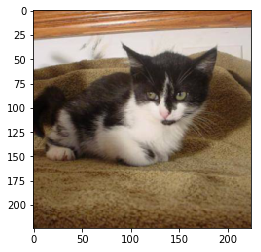

In [88]:
gen = base_gen(224, scale_and_center)
trn_it = FilesIter(fnames=trn_fnames, y=trn_y, gen=gen, bs=48, shuffle=True)
val_it = FilesIter(fnames=val_fnames, y=val_y, gen=gen, bs=48, shuffle=False)
x,y = next(iter(val_it))
plt.imshow(x[0]);

In [74]:
from vgg16 import Vgg16

In [75]:
vgg = Vgg16(path, ps=[0.25, 0.25, 0.5])

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
-- freeze -1


In [76]:
m=vgg.model

In [97]:
class Dataset():
    def __init__(self, trn_it, val_it): self.trn_it,self.val_it = trn_it,val_it
    
    @property
    def val_nb(self): return self.val_it.n_batch    
    @property
    def trn_nb(self): return self.trn_it.n_batch
    
    def train(self, m, **kwargs):
        return m.fit_generator(self.trn_it, self.trn_nb, 
           validation_data=self.val_it, validation_steps=self.val_nb, **kwargs)

In [98]:
ds = Dataset(trn_it, val_it)

In [99]:
vgg.set_lr(1e-4)

-- lr 0.0001


In [101]:
ds.train(m)

Epoch 1/1
84/84 [==============================] - 50s - loss: 0.1043 - acc: 0.9683 - val_loss: 0.0523 - val_acc: 0.9803
